In [2]:
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.case_db import *
from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *
import matplotlib as mpl

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [122]:
db = CaseDB()
toload = {
    # "base" :"std1a-SPR45_fimp06_NeFunc065_frec1",
    # "better_init" : "std2a-better_initialisation",
    # "hires" : "std7a-1600_dymin_0.02",
    "ar16pc" : "stc9e-ar16pc",
    "pulsebase" : "std9d-stop_pi",
    "pulse" : "std9da-2x_power_full",
    "pulsediffuse" : "std9db-2x_power_upwind_lowndiffuse",
    
    
}

cs = dict()   # casestore

for name in toload:
    print(f"Loading {toload[name]}")
    cs[name] = Load.case_1D(db.casepaths[toload[name]])


Loading stc9e-ar16pc


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading std9d-stop_pi


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading std9da-2x_power_full


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Loading std9db-2x_power_upwind_lowndiffuse


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


In [72]:
plt.close("all")
%matplotlib inline

In [81]:
len(cs["base"].ds["t"])

67

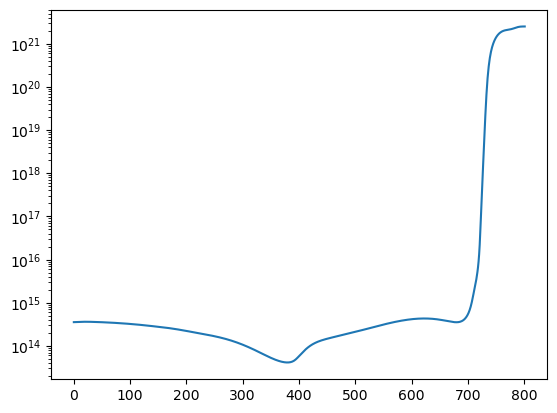

In [83]:
fig, ax = plt.subplots()
ds = cs["base"].ds.isel(t=30, pos = slice(1,-1))
data = ds["Nd"].values
ax.plot(range(len(data)), data)
ax.set_yscale("log")

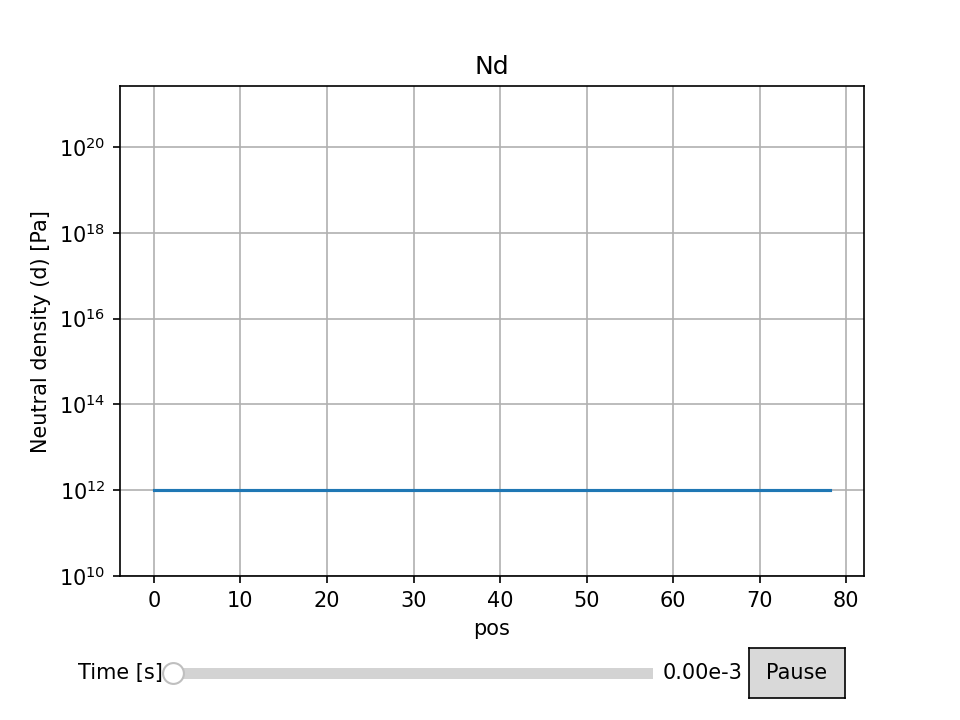

In [97]:
ds= cs["base"].ds.isel(pos=slice(1,-1))

fig, ax = plt.subplots(dpi = 150)

anim = xbout.plotting.animate.animate_line(ds["Nd"], ax = ax)
ax.set_yscale("log")
ax.set_ylim(1e10,None)
ax.grid()

In [108]:
%matplotlib widget

In [ ]:
ds.data_vars

In [129]:
len(cs["pulse"].ds["t"])

191

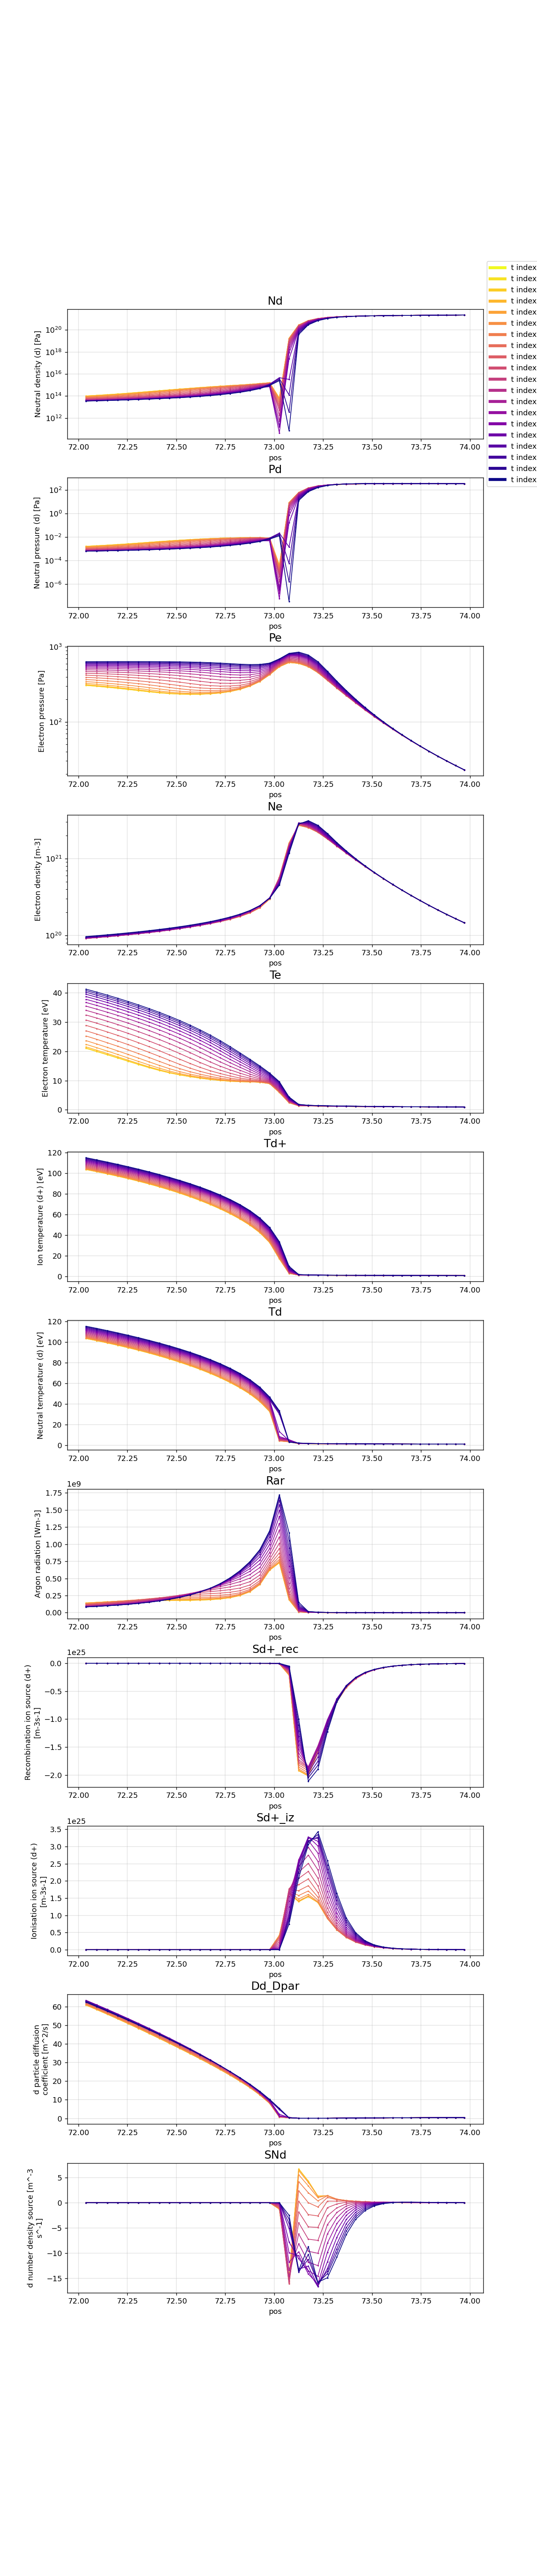

In [140]:
plt.close("all")
case = cs["pulse"]
ds = case.ds.isel(pos=slice(2,-2))


def plot(list_params):
    fig, axes = plt.subplots(len(list_params),1, figsize=(10, len(list_params)*4), dpi = 130)
    fig.subplots_adjust(hspace = 0.3)
    
    # times = np.arange(0,len(ds["t"]),10)
    times = np.arange(0,191,10)

    alphas = [1] * len(times)
    colors = make_cmap("plasma", len(times))[::-1]
    legendlist = []; labels = []
    for j, param in enumerate(list_params):
        for i, tind in enumerate(times):
            data = ds[param].isel(t=tind)
            # data = data.sel(pos=slice(20,35))
            data = data.sel(pos=slice(72,74))
            data.plot(ax = axes[j], x = "pos", marker = "o",  color = colors[i], ms = 1, lw = 1, alpha = alphas[i])
            
            if j == 0:
                legendlist.append(mpl.lines.Line2D([0],[0], color = colors[i], lw = 4))
                labels.append(f"t index = {tind}")
            
        axes[j].grid(alpha = 0.3, lw = 1)
        axes[j].set_title(param, fontsize = 15)
        
        if param in ["Nd", "Ne", "Pe", "Pd"]:
            axes[j].set_yscale("log")
        
        
        # axes[j].legend(fontsize=8)
        # axes[j].set_yscale("symlog")
        
    
        
    fig.legend(legendlist, labels, loc = "upper left", bbox_to_anchor = (0.9,0.9))
plot(["Nd", "Pd", "Pe", "Ne", "Te", "Td+", "Td","Rar", "Sd+_rec", "Sd+_iz", "Dd_Dpar", "SNd"])
# plot(["Ne", "Nd", "NVd+", "Te", "Td+", "Td", "Pd", "Pd+", "Pe"])
# plot([])
# plot(["Nd", "Sd+_iz", "Sd_Dpar", "Ed_Dpar", "Fd_Dpar", "Dd_Dpar", "SNd"])
